# IMPORT ALL THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , MinMaxScaler , StandardScaler , LabelEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# IMPORT DATA

In [2]:
data = pd.read_csv('C:\DATA SCIENCE\Projects\Data\metallica\\Metallica_gigs.csv'  , delimiter=';')

# Check Top Five Rows

In [3]:
data.head()

,Date,Event,Venue,Location,Latitude,Longitude,Is_cancelled,Setlist_no,Song,Is_cover,Song_details,Song_profile_link,Tour,Other_acts,Concert_details,Concert_profile_link
0,1982-03-14,NaN,Radio City,"Anaheim,California,United States",33.834752,-117.911732,No,1,Hit the Lights,No,Live Debut,https://www.metallica.com/songs/hit-the-lights...,NaN,NaN,NaN,https://www.metallica.com/tour/1982-03-14-anah...
1,1982-03-14,NaN,Radio City,"Anaheim,California,United States",33.834752,-117.911732,No,2,Blitzkrieg,Yes,Live Debut,https://www.metallica.com/songs/blitzkrieg.html,NaN,NaN,NaN,https://www.metallica.com/tour/1982-03-14-anah...
2,1982-03-14,NaN,Radio City,"Anaheim,California,United States",33.834752,-117.911732,No,3,Helpless,Yes,Live Debut,https://www.metallica.com/songs/helpless.html,NaN,NaN,NaN,https://www.metallica.com/tour/1982-03-14-anah...
3,1982-03-14,NaN,Radio City,"Anaheim,California,United States",33.834752,-117.911732,No,4,Jump in the Fire,No,Live Debut,https://www.metallica.com/songs/jump-in-the-fi...,NaN,NaN,NaN,https://www.metallica.com/tour/1982-03-14-anah...
4,1982-03-14,NaN,Radio City,"Anaheim,California,United States",33.834752,-117.911732,No,5,Let It Loose,Yes,Live Debut,https://www.metallica.com/songs/let-it-loose.html,NaN,NaN,NaN,https://www.metallica.com/tour/1982-03-14-anah...


# Check Shape Of The Data

In [4]:
data.shape

(32448, 16)

# Check Last Five Rows

In [5]:
data.tail()

,Date,Event,Venue,Location,Latitude,Longitude,Is_cancelled,Setlist_no,Song,Is_cover,Song_details,Song_profile_link,Tour,Other_acts,Concert_details,Concert_profile_link
32443,2023-12-14,Soundstorm Festival,Banban,"Riyadh,Saudi Arabia",24.638916,46.716010,No,13,Seek & Destroy,No,NaN,https://www.metallica.com/songs/seek-and-destr...,M72 World Tour,NaN,NaN,https://www.metallica.com/tour/2023-12-14-riya...
32444,2023-12-14,Soundstorm Festival,Banban,"Riyadh,Saudi Arabia",24.638916,46.716010,No,14,One,No,NaN,https://www.metallica.com/songs/one.html,M72 World Tour,NaN,NaN,https://www.metallica.com/tour/2023-12-14-riya...
32445,2023-12-14,Soundstorm Festival,Banban,"Riyadh,Saudi Arabia",24.638916,46.716010,No,15,Master of Puppets,No,NaN,https://www.metallica.com/songs/master-of-pupp...,M72 World Tour,NaN,NaN,https://www.metallica.com/tour/2023-12-14-riya...
32446,2023-12-14,Soundstorm Festival,Banban,"Riyadh,Saudi Arabia",24.638916,46.716010,No,16,Enter Sandman,No,NaN,https://www.metallica.com/songs/enter-sandman....,M72 World Tour,NaN,NaN,https://www.metallica.com/tour/2023-12-14-riya...
32447,2024-03-20,The Library of Congress Gershwin Prize for Pop...,DAR Constitution Hall,"Washington,District of Columbia,United States",38.895037,-77.036543,No,1,Funeral for a Friend/Love Lies Bleeding,Yes,NaN,https://www.metallica.com/songs/funeral-for-a-...,NaN,"Joni Mitchell,Garth Brooks,Brandi Carlile,Anni...",NaN,https://www.metallica.com/tour/2024-03-20-wash...


# Random Row Of The Data

In [6]:
data.sample()

,Date,Event,Venue,Location,Latitude,Longitude,Is_cancelled,Setlist_no,Song,Is_cover,Song_details,Song_profile_link,Tour,Other_acts,Concert_details,Concert_profile_link
27376,2013-04-27,NaN,FNB Stadium,"Johannesburg,South Africa",-26.205,28.049722,No,3,Ride the Lightning,No,NaN,https://www.metallica.com/songs/ride-the-light...,NaN,NaN,NaN,https://www.metallica.com/tour/2013-04-27-joha...


# Check Data Types 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32448 entries, 0 to 32447
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  32448 non-null  object 
 1   Event                 4805 non-null   object 
 2   Venue                 32448 non-null  object 
 3   Location              32448 non-null  object 
 4   Latitude              32448 non-null  float64
 5   Longitude             32448 non-null  float64
 6   Is_cancelled          32448 non-null  object 
 7   Setlist_no            32448 non-null  int64  
 8   Song                  32349 non-null  object 
 9   Is_cover              32220 non-null  object 
 10  Song_details          1553 non-null   object 
 11  Song_profile_link     32168 non-null  object 
 12  Tour                  28100 non-null  object 
 13  Other_acts            24633 non-null  object 
 14  Concert_details       40 non-null     object 
 15  Concert_profile_lin

# Change The Data Type of data['Date'] from 'object' to 'to_datetime'

In [8]:
data['Date'] = pd.to_datetime(data['Date'])


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32448 entries, 0 to 32447
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  32448 non-null  datetime64[ns]
 1   Event                 4805 non-null   object        
 2   Venue                 32448 non-null  object        
 3   Location              32448 non-null  object        
 4   Latitude              32448 non-null  float64       
 5   Longitude             32448 non-null  float64       
 6   Is_cancelled          32448 non-null  object        
 7   Setlist_no            32448 non-null  int64         
 8   Song                  32349 non-null  object        
 9   Is_cover              32220 non-null  object        
 10  Song_details          1553 non-null   object        
 11  Song_profile_link     32168 non-null  object        
 12  Tour                  28100 non-null  object        
 13  Other_acts      

# Check Total Number Of Null Values In The Data

In [10]:
data.isnull().sum()

Date                        0
Event                   27643
Venue                       0
Location                    0
Latitude                    0
Longitude                   0
Is_cancelled                0
Setlist_no                  0
Song                       99
Is_cover                  228
Song_details            30895
Song_profile_link         280
Tour                     4348
Other_acts               7815
Concert_details         32408
Concert_profile_link        0
dtype: int64

# Check Percentage Of The Null Values

In [11]:
data.isnull().sum()*100/len(data)

Date                     0.000000
Event                   85.191691
Venue                    0.000000
Location                 0.000000
Latitude                 0.000000
Longitude                0.000000
Is_cancelled             0.000000
Setlist_no               0.000000
Song                     0.305104
Is_cover                 0.702663
Song_details            95.213881
Song_profile_link        0.862919
Tour                    13.399901
Other_acts              24.084689
Concert_details         99.876726
Concert_profile_link     0.000000
dtype: float64

# Drop Columns With Null Values More Than 20%

In [12]:
l = []
for i in data.columns:
    if data[i].isnull().sum()*100/len(data) >=20:
        l.append(i)

In [13]:
data.drop(columns=l,inplace = True)

In [14]:
data.isnull().sum()

Date                       0
Venue                      0
Location                   0
Latitude                   0
Longitude                  0
Is_cancelled               0
Setlist_no                 0
Song                      99
Is_cover                 228
Song_profile_link        280
Tour                    4348
Concert_profile_link       0
dtype: int64

In [15]:
data.sample()

,Date,Venue,Location,Latitude,Longitude,Is_cancelled,Setlist_no,Song,Is_cover,Song_profile_link,Tour,Concert_profile_link
13208,1996-07-21,Forks in the River,"Knoxville,Tennessee,United States",35.960395,-83.921026,No,8,One,No,https://www.metallica.com/songs/one.html,Lollapalooza,https://www.metallica.com/tour/1996-07-21-knox...


# Drop Columns Which Are Not Necessary

In [16]:
columns_to_drop = ['Song_profile_link', 'Concert_profile_link']


In [17]:
data = data.drop(columns=columns_to_drop)


In [18]:
data.sample()

,Date,Venue,Location,Latitude,Longitude,Is_cancelled,Setlist_no,Song,Is_cover,Tour
20862,2004-06-13,Olympiastadion,"Munich,Germany",48.137108,11.575382,No,10,Creeping Death,No,Madly In Anger With The World


In [19]:
data.isnull().sum()

Date               0
Venue              0
Location           0
Latitude           0
Longitude          0
Is_cancelled       0
Setlist_no         0
Song              99
Is_cover         228
Tour            4348
dtype: int64

# Making Different Columns Of Year , Month and Day

In [20]:
data['year'] = data['Date'].dt.year

In [21]:
data['month_no'] = data['Date'].dt.month

In [22]:
data['day'] = data['Date'].dt.day

In [23]:
data.sample()

,Date,Venue,Location,Latitude,Longitude,Is_cancelled,Setlist_no,Song,Is_cover,Tour,year,month_no,day
2606,1986-12-10,Sudbury Community Arena,"Greater Sudbury,Ontario,Canada",46.49272,-80.991211,No,7,Seek & Destroy,No,"Damage, Inc.",1986,12,10


# Checking OUTLIERS Using Boxplot

<Axes: xlabel='Song'>

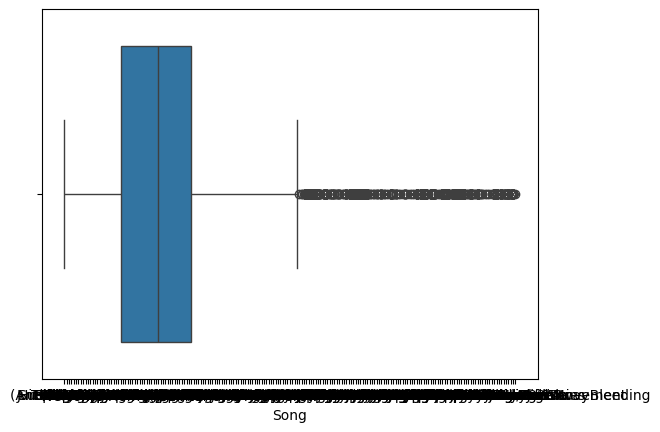

In [24]:
sns.boxplot(x = data['Song'])

<Axes: xlabel='Is_cover'>

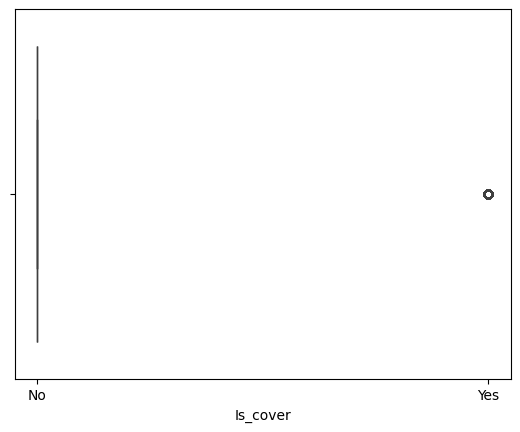

In [25]:
sns.boxplot(x = data['Is_cover'])

<Axes: xlabel='Tour'>

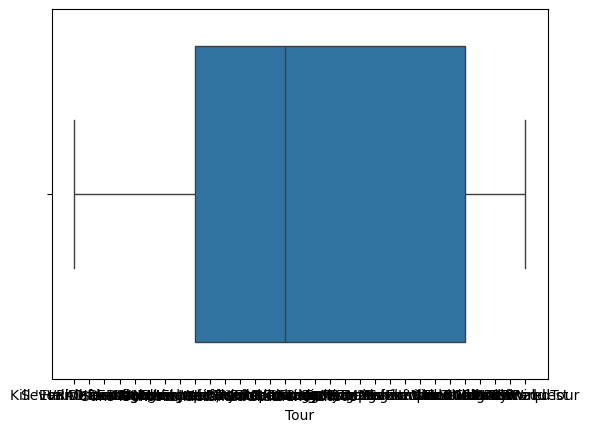

In [26]:
sns.boxplot(x = data['Tour'])

# Handling Missing Values Using Mean , Median or Mode 

In [27]:
data['Song'].value_counts()

Song
Master of Puppets                          1702
Seek & Destroy                             1633
Creeping Death                             1579
One                                        1552
For Whom the Bell Tolls                    1546
                                           ... 
Fixxxer                                       1
Borderline                                    1
It's Killing Me                               1
Blackened 2020                                1
Funeral for a Friend/Love Lies Bleeding       1
Name: count, Length: 193, dtype: int64

In [28]:
data['Song'] = data['Song'].fillna(data['Song'].mode()[0])

In [29]:
data['Is_cover'].unique()

array(['No', 'Yes', nan], dtype=object)

In [30]:
data['Is_cover'] = data['Is_cover'].fillna(data['Is_cover'].mode()[0])

In [31]:
data['Tour'].unique()

array([nan, "Kill 'Em All for One", 'Seven Dates of Hell',
       'Hell On Earth Tour', 'Ride the Lightning', 'Damage, Inc.',
       "Van Halen's Monsters of Rock", 'Damaged Justice',
       'Monsters of Rock', 'Wherever We May Roam',
       'Guns N’ Roses/Metallica Stadium Tour', 'Nowhere Else to Roam',
       'Summer Shit / Shit Hits the Sheds', "Escape from the Studio '95",
       'Lollapalooza', 'Poor Touring Me', "Blitzkrieg '97",
       'Poor ReTouring Me', 'Garage Barrage',
       'The Garage Remains the Same', 'M2K', 'Summer Sanitarium',
       'Summer Sanitarium 2003', 'Madly In Anger With The World',
       "Escape from the Studio '06", "Sick of the Studio '07",
       'European Vacation', 'World Magnetic', 'The Full Arsenal',
       'Metallica By Request', 'WorldWired', 'M72 World Tour'],
      dtype=object)

In [32]:
data['Tour'] = data['Tour'].fillna(data['Tour'].mode()[0])

# Re-Check The Null Values Again

In [33]:
data.isnull().sum()

Date            0
Venue           0
Location        0
Latitude        0
Longitude       0
Is_cancelled    0
Setlist_no      0
Song            0
Is_cover        0
Tour            0
year            0
month_no        0
day             0
dtype: int64

# VISUALIZATION Of The Data Using MATPLOTLIB

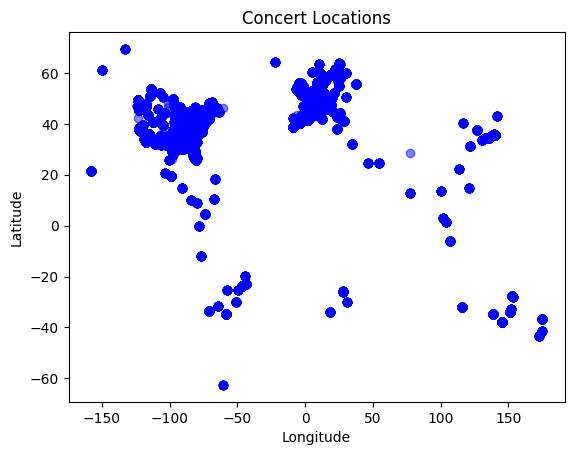

In [34]:

plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5, c='blue')
plt.title('Concert Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


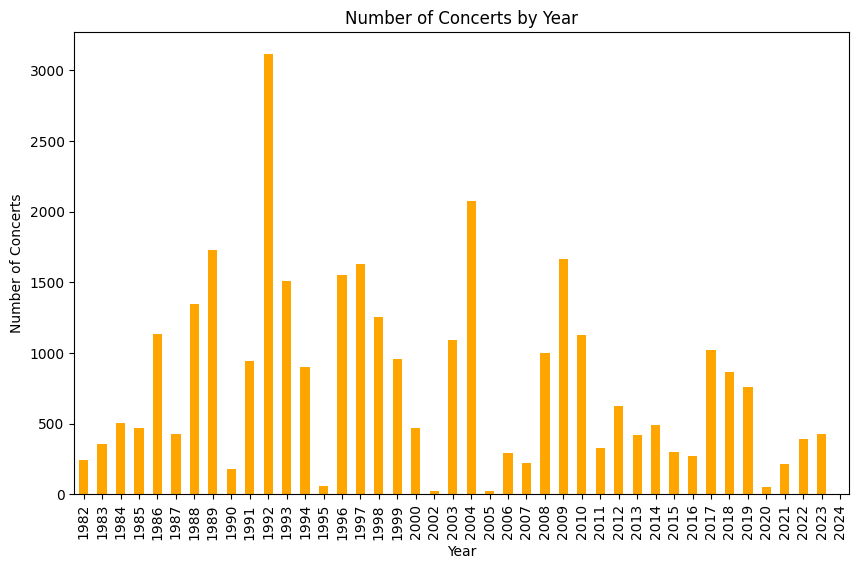

In [35]:
data['Year'] = pd.to_datetime(data['Date']).dt.year
yearly_concerts = data['Year'].value_counts().sort_index()

yearly_concerts.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Number of Concerts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Concerts')
plt.show()


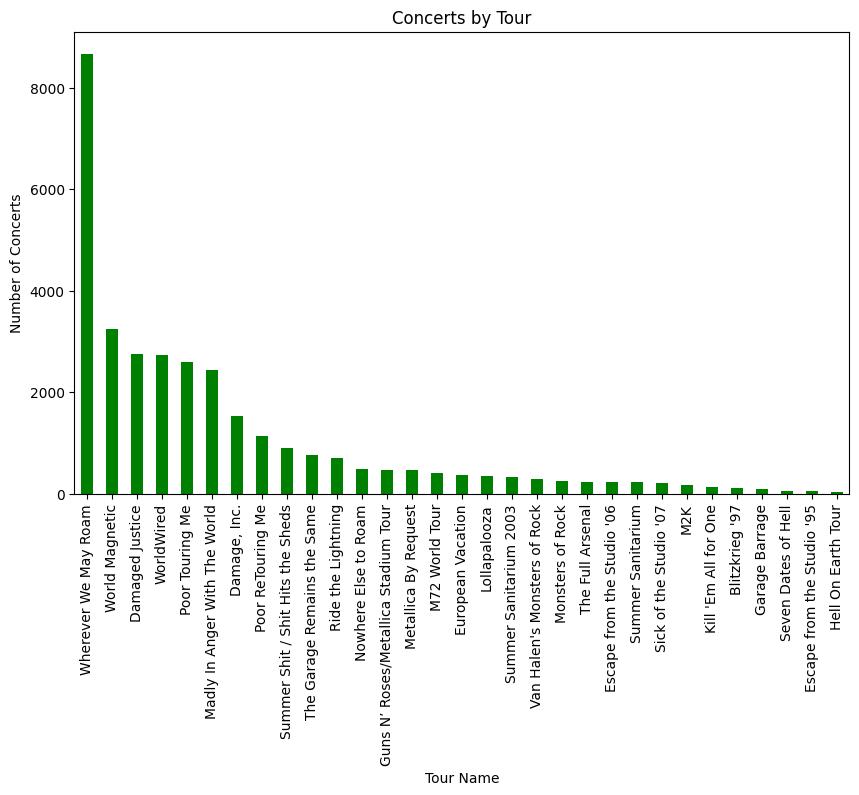

In [36]:
tour_counts = data['Tour'].value_counts()

tour_counts.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Concerts by Tour')
plt.xlabel('Tour Name')
plt.ylabel('Number of Concerts')
plt.show()


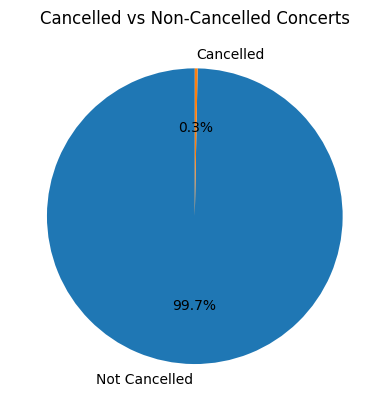

In [37]:
cancel_counts = data['Is_cancelled'].value_counts()

cancel_counts.plot(kind='pie', labels=['Not Cancelled', 'Cancelled'], autopct='%1.1f%%', startangle=90)
plt.title('Cancelled vs Non-Cancelled Concerts')
plt.ylabel('')
plt.show()


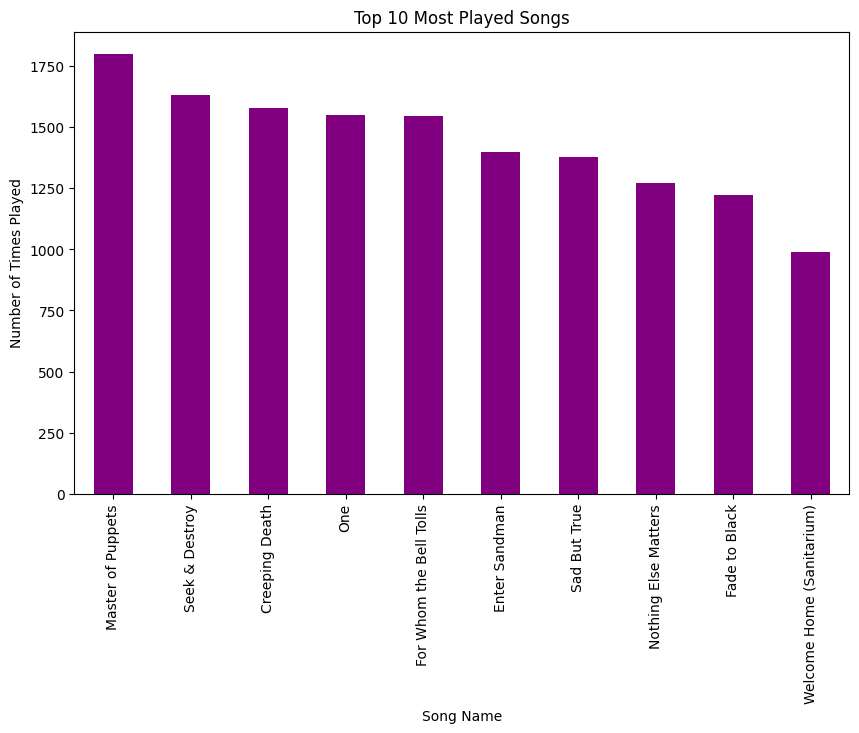

In [38]:
song_counts = data['Song'].value_counts().head(10)

song_counts.plot(kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 10 Most Played Songs')
plt.xlabel('Song Name')
plt.ylabel('Number of Times Played')
plt.show()


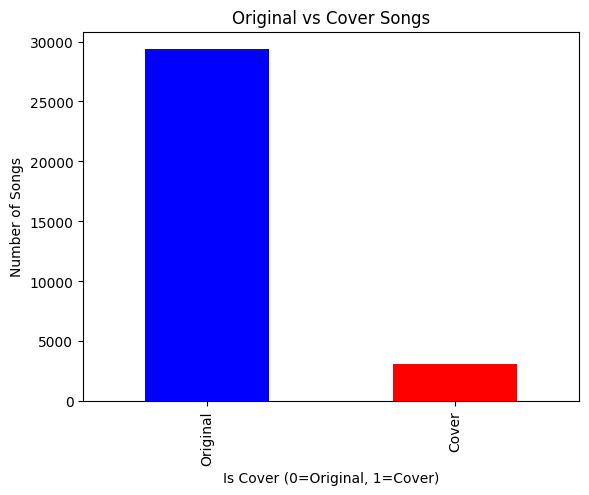

In [39]:
cover_counts = data['Is_cover'].value_counts()

cover_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Original vs Cover Songs')
plt.xlabel('Is Cover (0=Original, 1=Cover)')
plt.ylabel('Number of Songs')
plt.xticks(ticks=[0, 1], labels=['Original', 'Cover'])
plt.show()


In [40]:

# sns.kdeplot(x=data['Longitude'], y=data['Latitude'], cmap='Blues', fill=True, bw_adjust=0.5)
# plt.title('Concert Density')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()


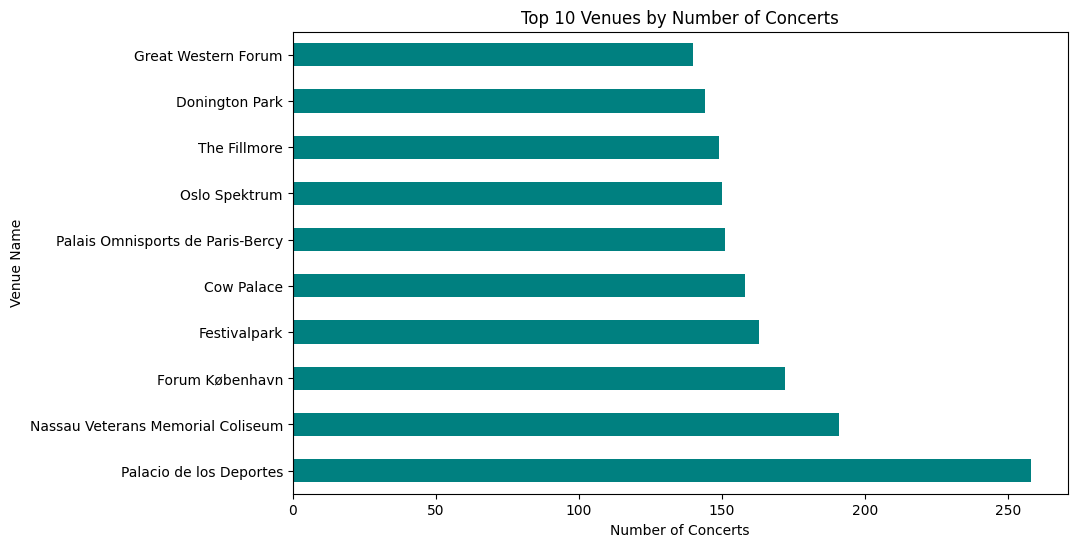

In [41]:
venue_counts = data['Venue'].value_counts().head(10)

venue_counts.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Top 10 Venues by Number of Concerts')
plt.xlabel('Number of Concerts')
plt.ylabel('Venue Name')
plt.show()


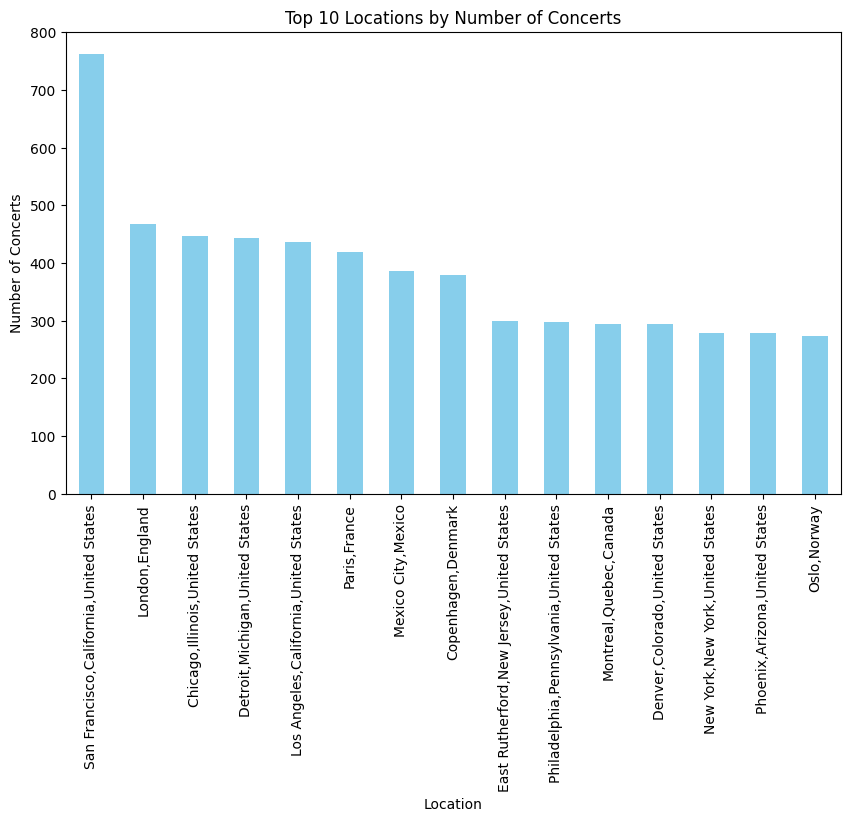

In [42]:
location_counts = data['Location'].value_counts().head(15)

location_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Locations by Number of Concerts')
plt.xlabel('Location')
plt.ylabel('Number of Concerts')
plt.show()


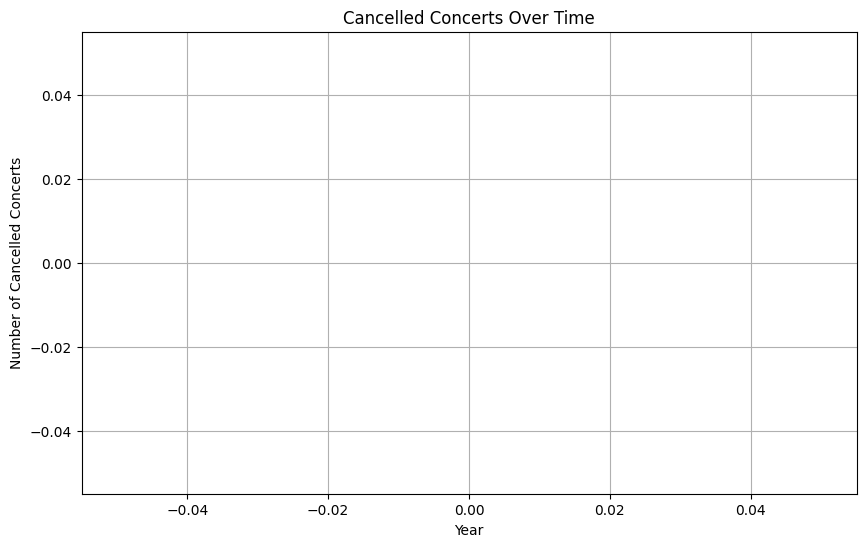

In [43]:
data['Year'] = pd.to_datetime(data['Date']).dt.year
cancelled_by_year = data[data['Is_cancelled'] == 1].groupby('Year').size()

cancelled_by_year.plot(kind='line', figsize=(10, 6), color='red', marker='o')
plt.title('Cancelled Concerts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cancelled Concerts')
plt.grid()
plt.show()


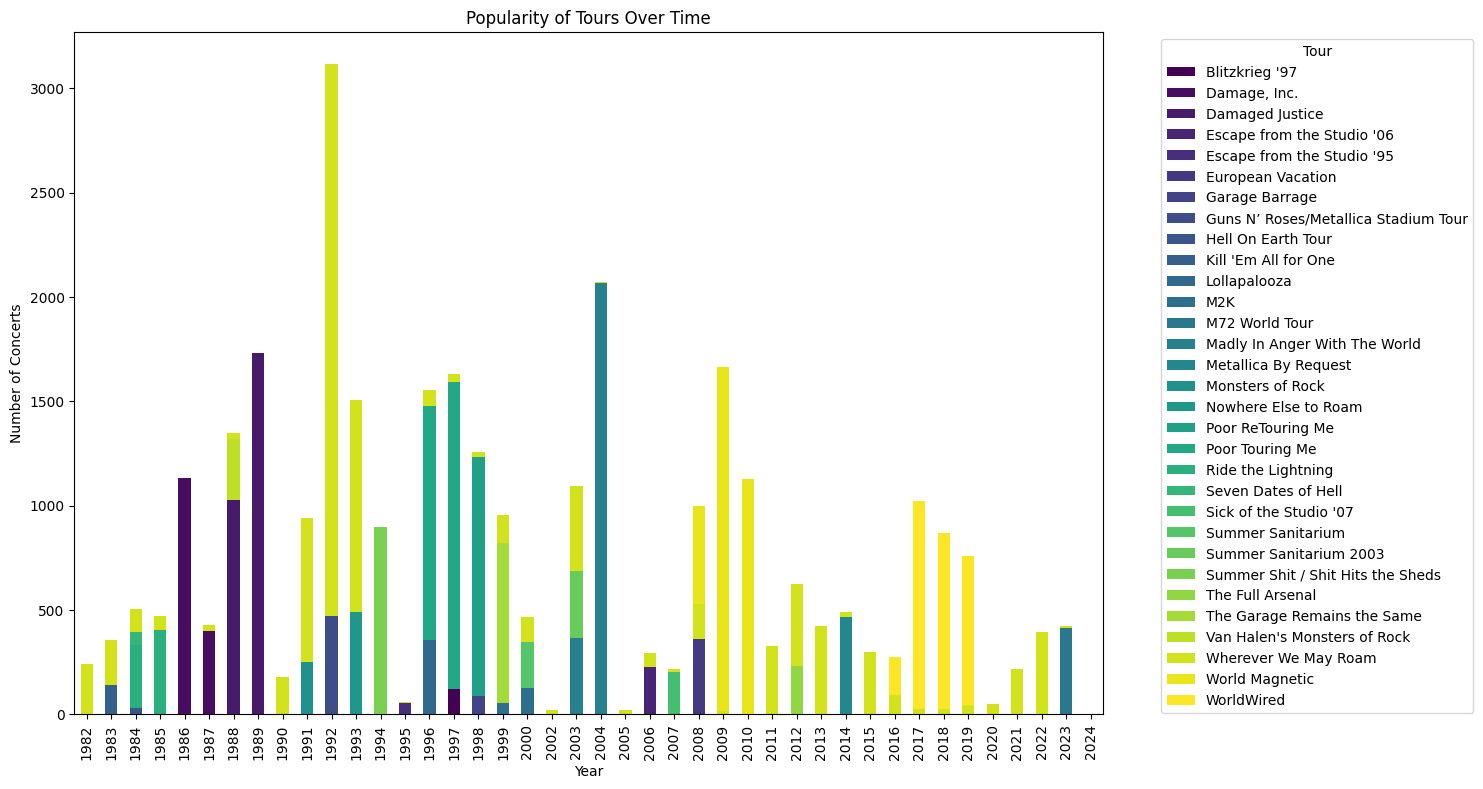

In [44]:
tour_years = data.groupby(['Year', 'Tour']).size().unstack(fill_value=0)

tour_years.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Popularity of Tours Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Concerts')
plt.legend(title='Tour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# VISUALIZATION Of The Data Using SEABORN 

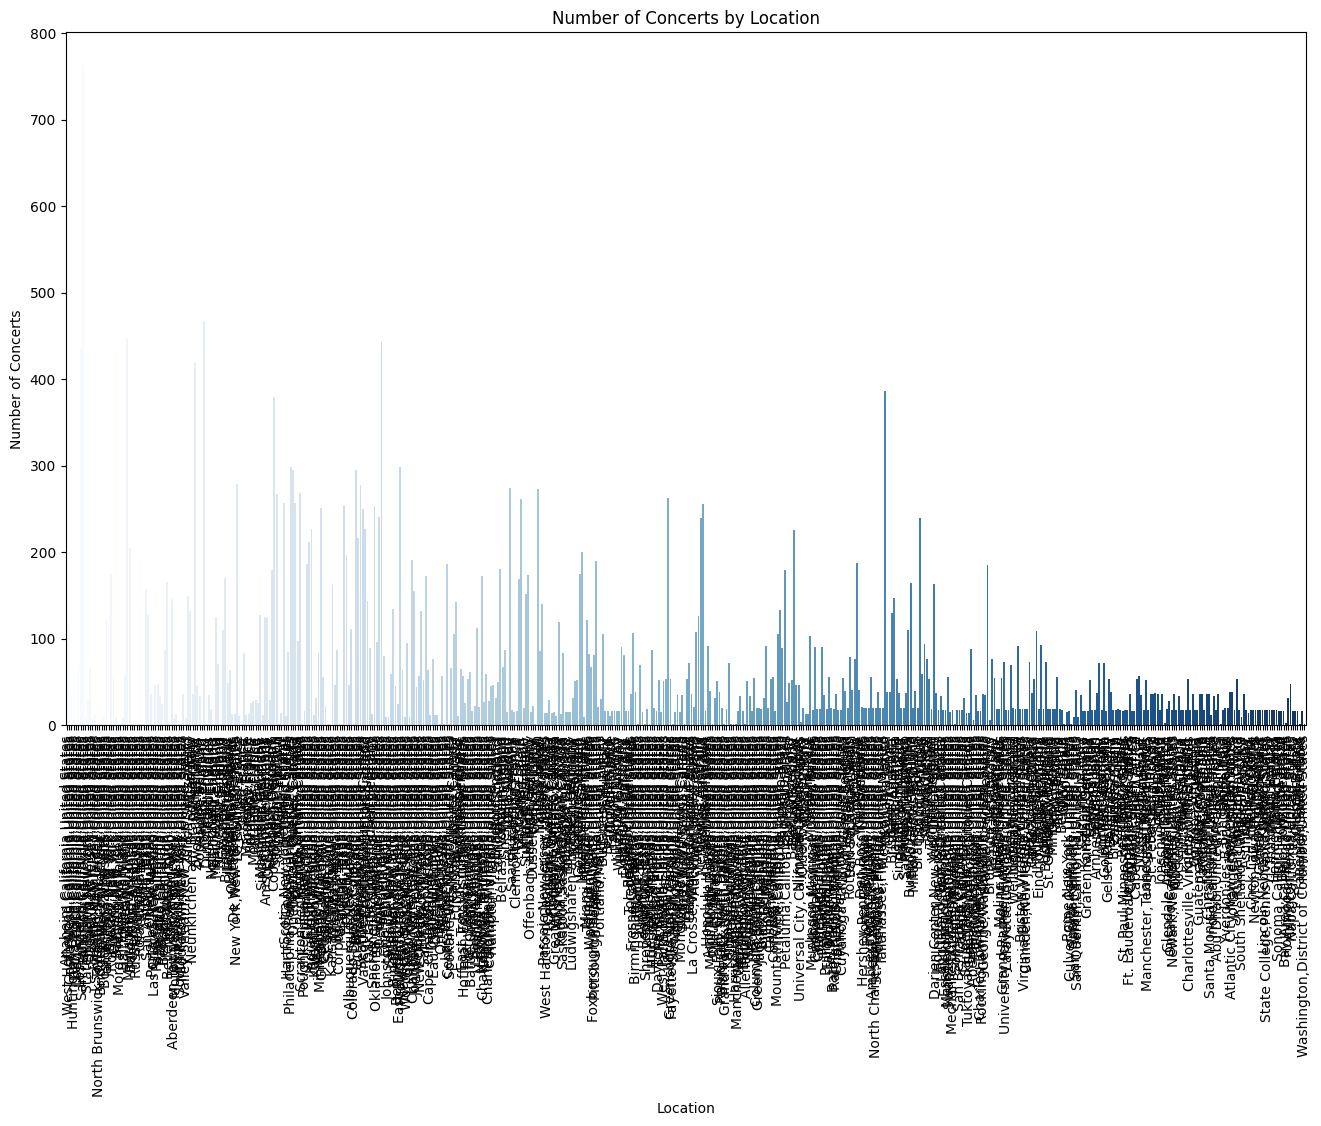

In [45]:
plt.figure(figsize=(16, 9))
sns.barplot(x='Location', y='Setlist_no', data=data, estimator=len, ci=None, palette='Blues')
plt.title("Number of Concerts by Location")
plt.xlabel("Location")
plt.ylabel("Number of Concerts")
plt.xticks(rotation=90)
plt.show()

# VISUALIZATION Of The Data Using SEABORN 

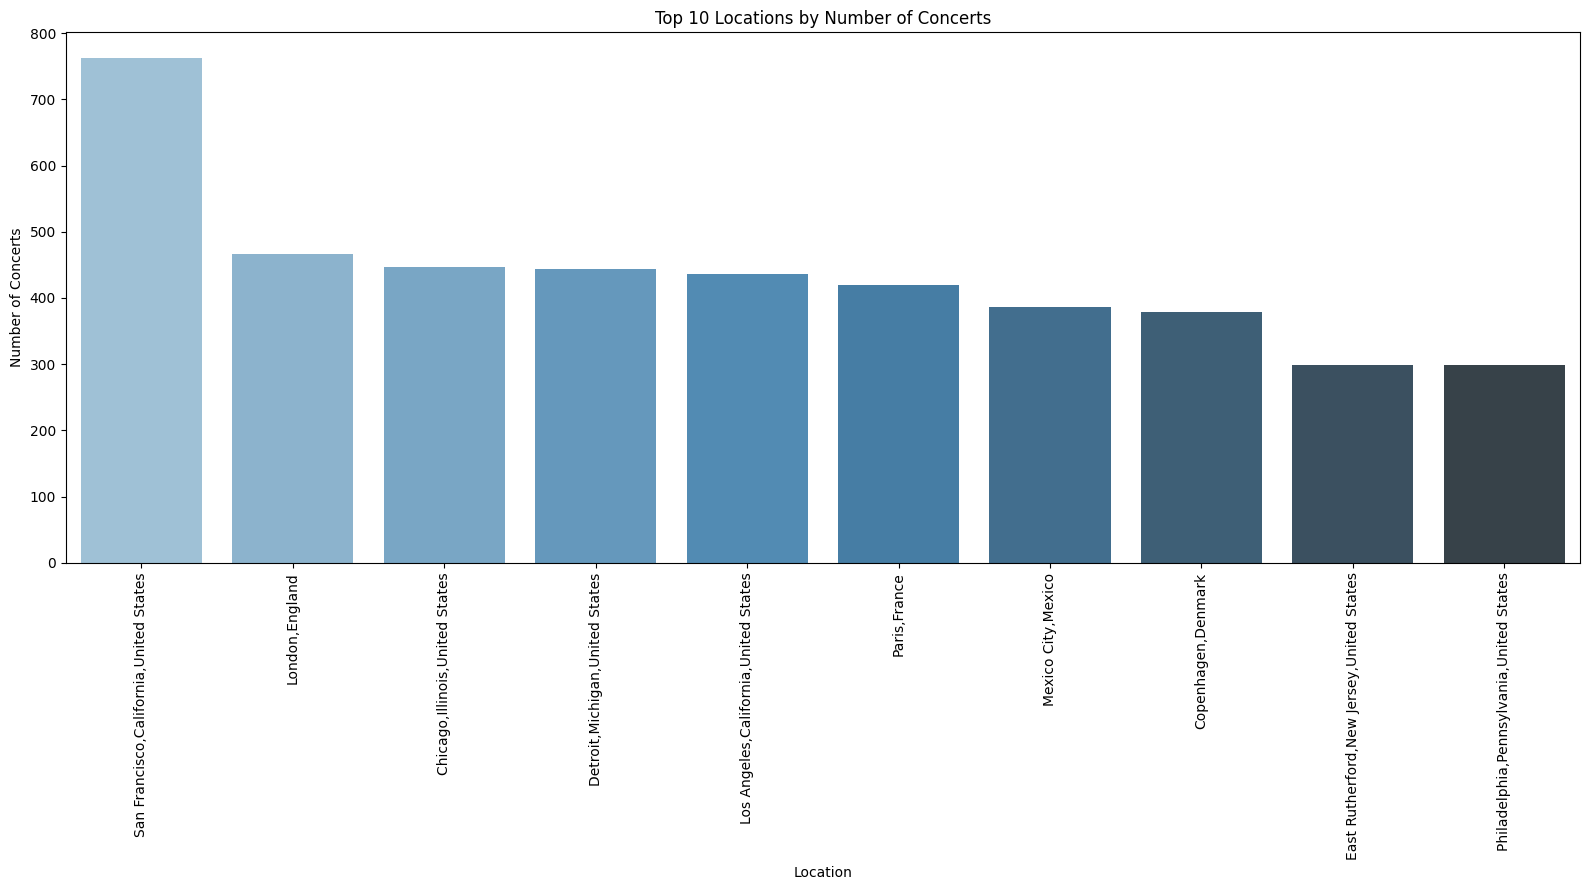

In [46]:
location_counts = data['Location'].value_counts().head(10)
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Number of Concerts']
plt.figure(figsize=(16, 9))
sns.barplot(x='Location', y='Number of Concerts', data=location_df, palette='Blues_d')
plt.title('Top 10 Locations by Number of Concerts')
plt.xlabel('Location')
plt.ylabel('Number of Concerts')
plt.xticks(rotation=90)
plt.tight_layout()

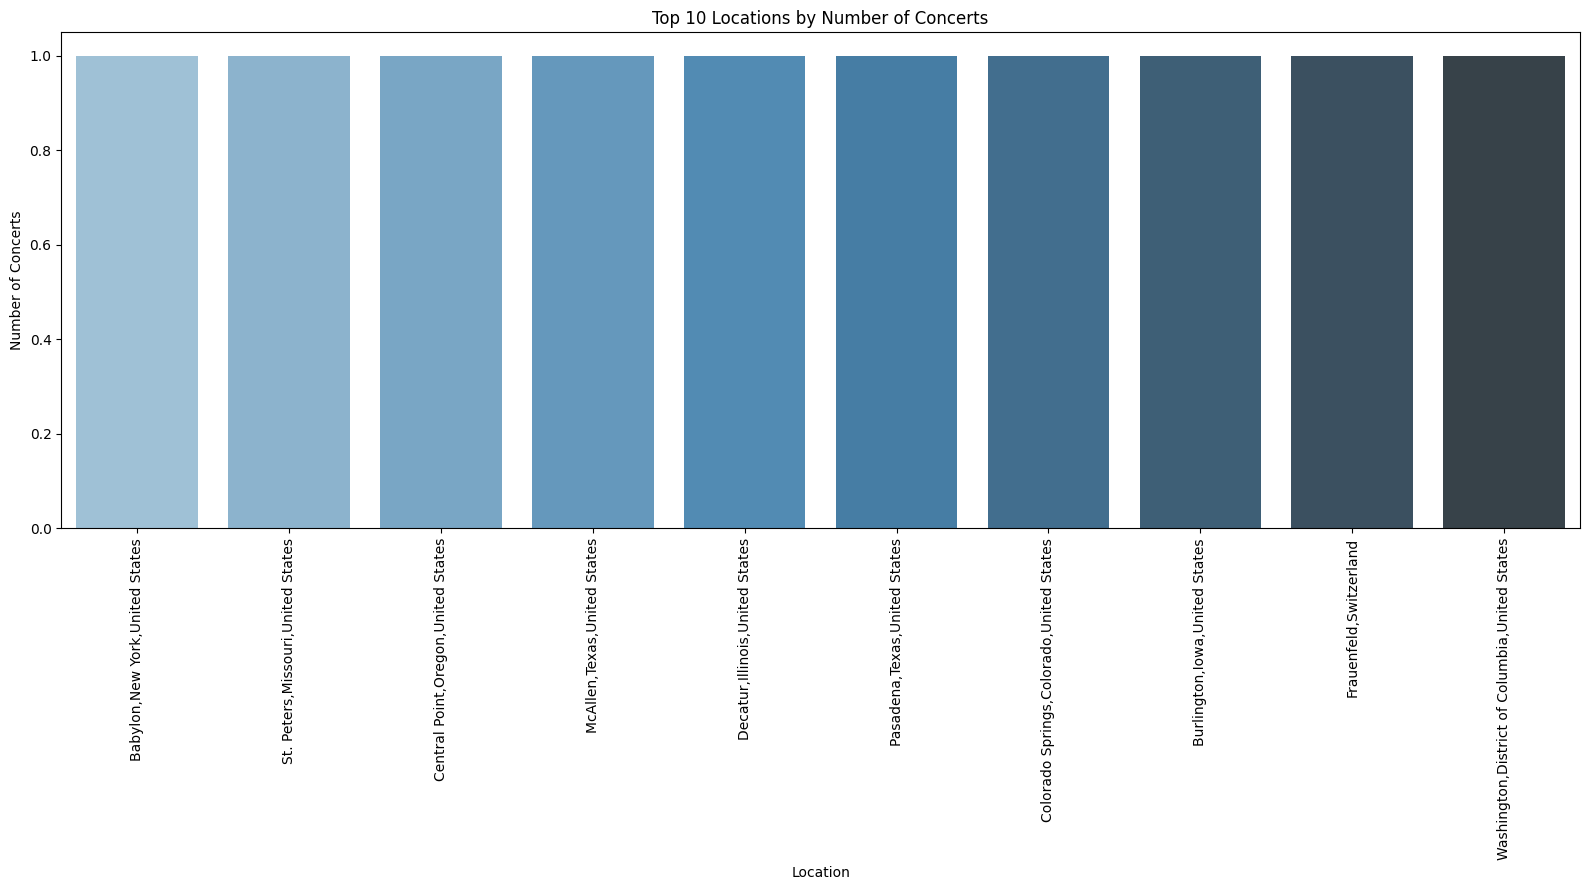

In [47]:
location_counts = data['Location'].value_counts().tail(10)
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Number of Concerts']
plt.figure(figsize=(16, 9))
sns.barplot(x='Location', y='Number of Concerts', data=location_df, palette='Blues_d')
plt.title('Top 10 Locations by Number of Concerts')
plt.xlabel('Location')
plt.ylabel('Number of Concerts')
plt.xticks(rotation=90)
plt.tight_layout()

In [48]:
# plt.figure(figsize=(16, 9))
# sns.barplot(x='Venue', y='Setlist_no', data=data, estimator='mean', ci=None, palette='Greens')
# plt.title("Average Setlist Length by Venue")
# plt.xlabel("Venue")
# plt.ylabel("Average Setlist Length")
# plt.xticks(rotation=45)
# plt.show()

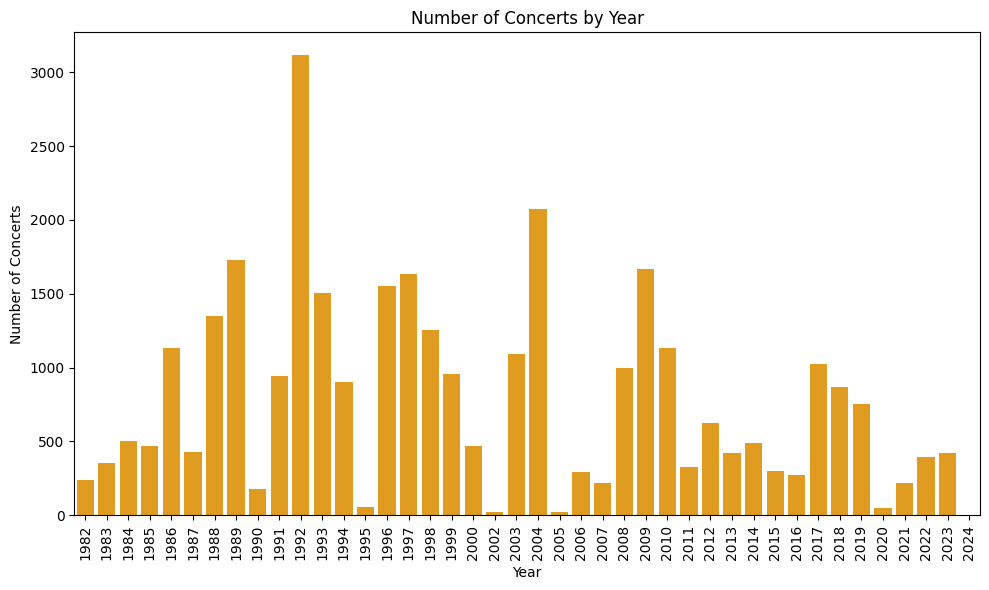

In [49]:
yearly_concerts = data['Year'].value_counts().sort_index()

yearly_concerts_df = yearly_concerts.reset_index()
yearly_concerts_df.columns = ['Year', 'Number of Concerts']

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Number of Concerts', data=yearly_concerts_df, color='orange')
plt.title('Number of Concerts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Concerts')

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()